# Case Study 4 : Data Science in Any Data You Like

**Required Readings:** 
* In this case study, you could use any data as you like.
* [TED Talks](https://www.ted.com/talks) for examples of 7 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using your Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
#We used the MovieLens data to find the best genre to recommend to a specific age group.
#In particular, we wanted to see how intriguing an age group would view each genre such as
#comedy, drama, action, etc.




# Data Collection/Processing: 

In [56]:
# #----------------------------------------------
# # Your code starts here
# #   Please add comments or text cells in between to explain the general idea of each block of the code.
# #   Please feel free to add more cells below this cell if necessary

import pandas as pd
import numpy as np
import operator
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt

#Get Movie, Ratings, and Users from data files
column = ['MovieID', 'Title', 'Genres']
movie = pd.read_csv('movies.dat', sep='::', header=None, names=column, engine='python')
column = ['UserID', 'MovieID', 'Rating', 'Timestamp']
rate = pd.read_csv('ratings.dat', sep='::', header=None, names=column, engine='python')
column = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
user = pd.read_csv('users.dat', sep='::', header=None, names=column, engine='python')

#Combine Movie, Ratings, and Users in one dataframe
data = pd.merge(movie, rate, on=['MovieID'])
data = pd.merge(data, user, on=['UserID'])

#Store data
hdf5 = pd.HDFStore('data.h5')
hdf5['data'] = data
hdf5.close()





# Data Exploration: Exploring the your data

** plot some properties/statistics/distribution of your data** 

Age: 0-9
+-------------+-------------+
|    Genre    | Mean Rating |
+-------------+-------------+
|     War     |     4.17    |
|    Drama    |     4.07    |
|    Crime    |     4.06    |
|   Thriller  |     4.02    |
|    Action   |     4.00    |
|    Sci-Fi   |     3.94    |
|  Adventure  |     3.90    |
|    Comedy   |     3.85    |
|   Romance   |     3.84    |
|   Fantasy   |     3.79    |
|  Animation  |     3.76    |
|    Horror   |     3.72    |
|   Mystery   |     3.72    |
|  Children's |     3.71    |
|   Musical   |     3.67    |
| Documentary |     0.00    |
|   Western   |     0.00    |
|  Film-Noir  |     0.00    |
+-------------+-------------+


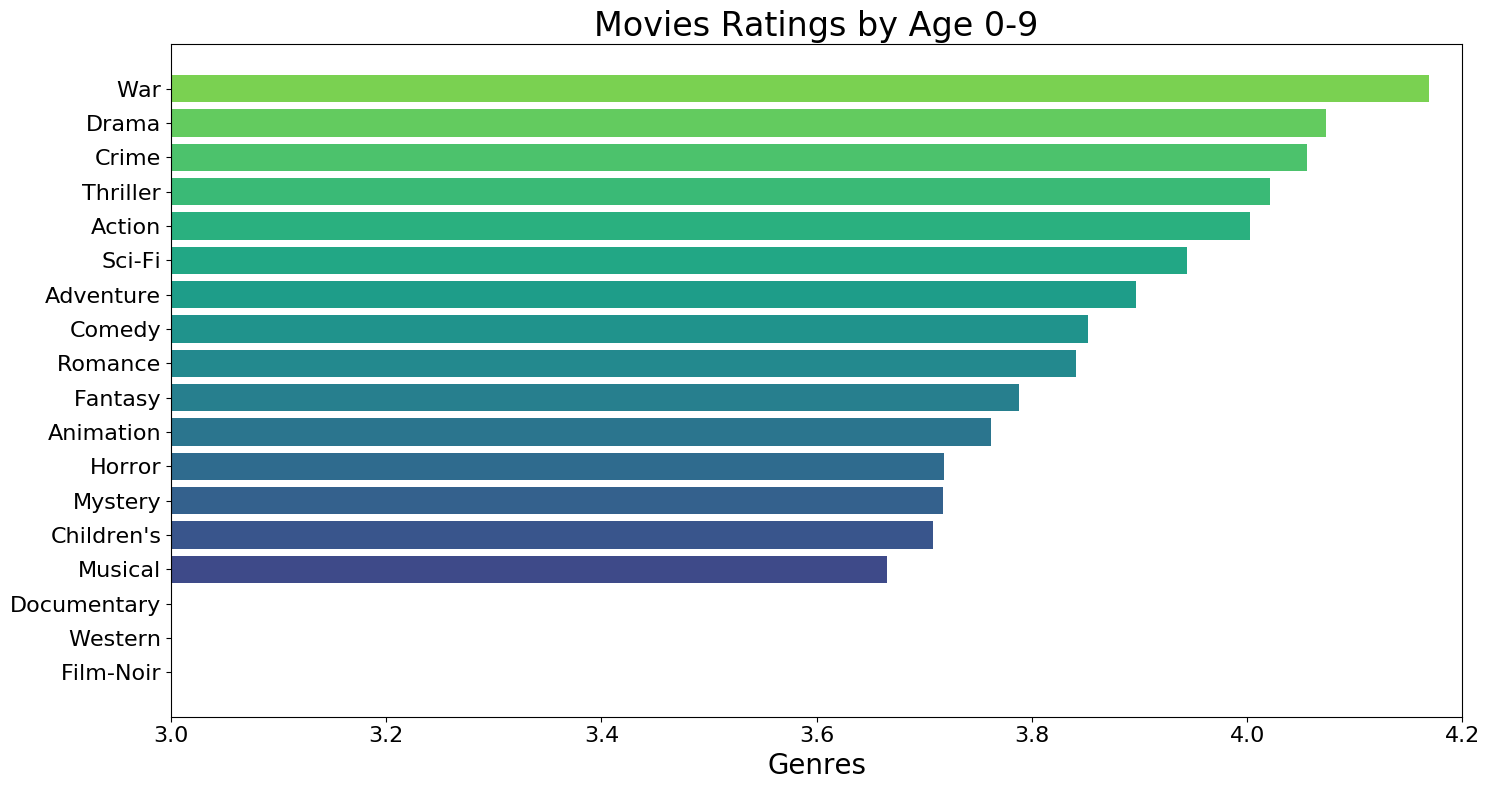

Age: 10-19
+-------------+-------------+
|    Genre    | Mean Rating |
+-------------+-------------+
| Documentary |     4.07    |
|  Film-Noir  |     4.06    |
|     War     |     3.89    |
|    Drama    |     3.82    |
|    Crime    |     3.71    |
|  Animation  |     3.68    |
|   Musical   |     3.61    |
|   Romance   |     3.59    |
|   Thriller  |     3.55    |
|    Comedy   |     3.54    |
|   Mystery   |     3.53    |
|    Action   |     3.50    |
|    Sci-Fi   |     3.48    |
|  Adventure  |     3.47    |
|   Western   |     3.46    |
|  Children's |     3.42    |
|   Fantasy   |     3.42    |
|    Horror   |     3.32    |
+-------------+-------------+


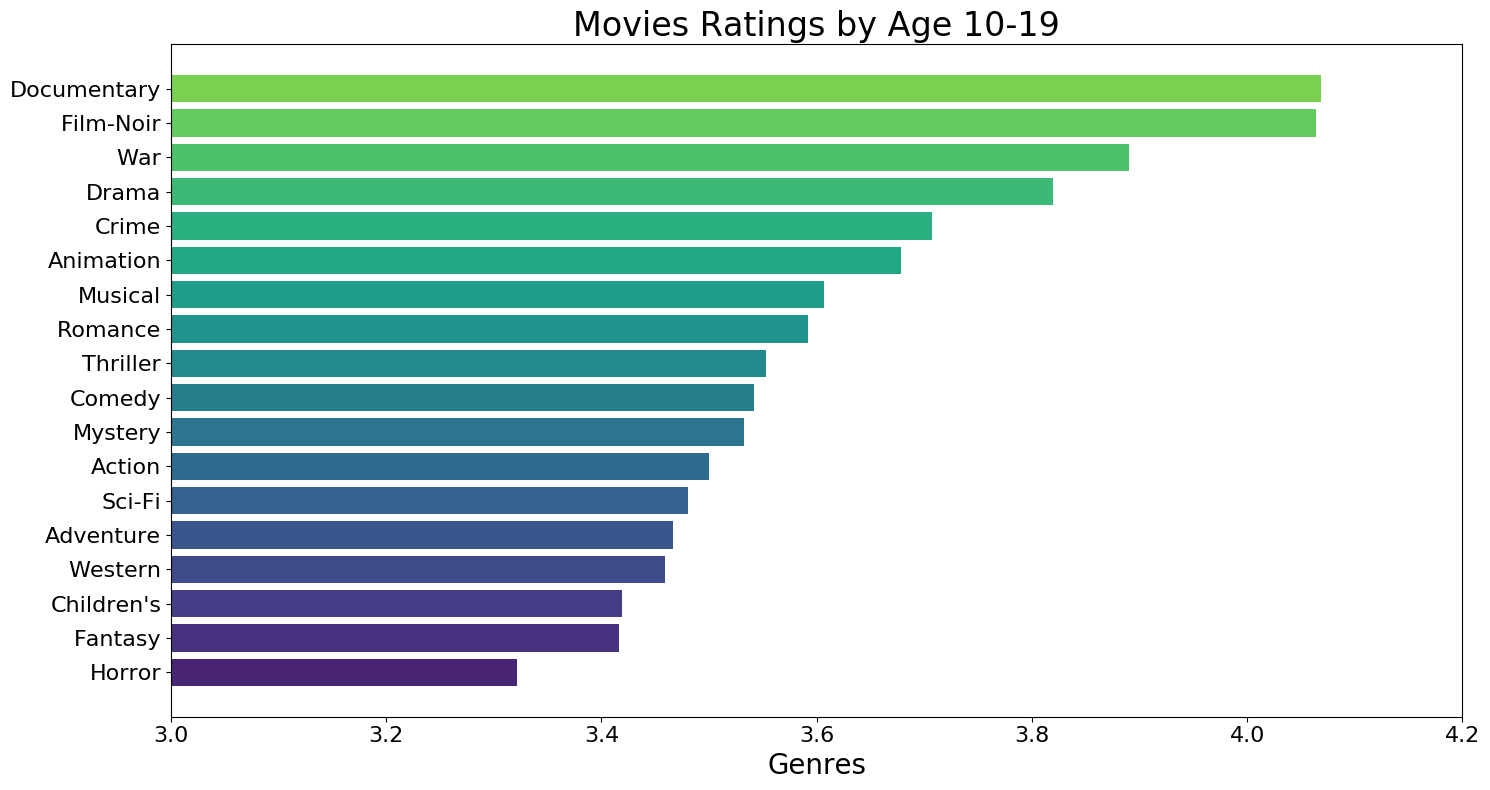

Age: 20-29
+-------------+-------------+
|    Genre    | Mean Rating |
+-------------+-------------+
|  Film-Noir  |     4.07    |
| Documentary |     4.01    |
|     War     |     3.86    |
|    Drama    |     3.77    |
|  Animation  |     3.75    |
|    Crime    |     3.70    |
|   Western   |     3.63    |
|   Musical   |     3.63    |
|   Mystery   |     3.63    |
|   Romance   |     3.57    |
|   Thriller  |     3.56    |
|    Comedy   |     3.53    |
|  Children's |     3.51    |
|   Fantasy   |     3.49    |
|    Action   |     3.47    |
|  Adventure  |     3.46    |
|    Sci-Fi   |     3.46    |
|    Horror   |     3.27    |
+-------------+-------------+


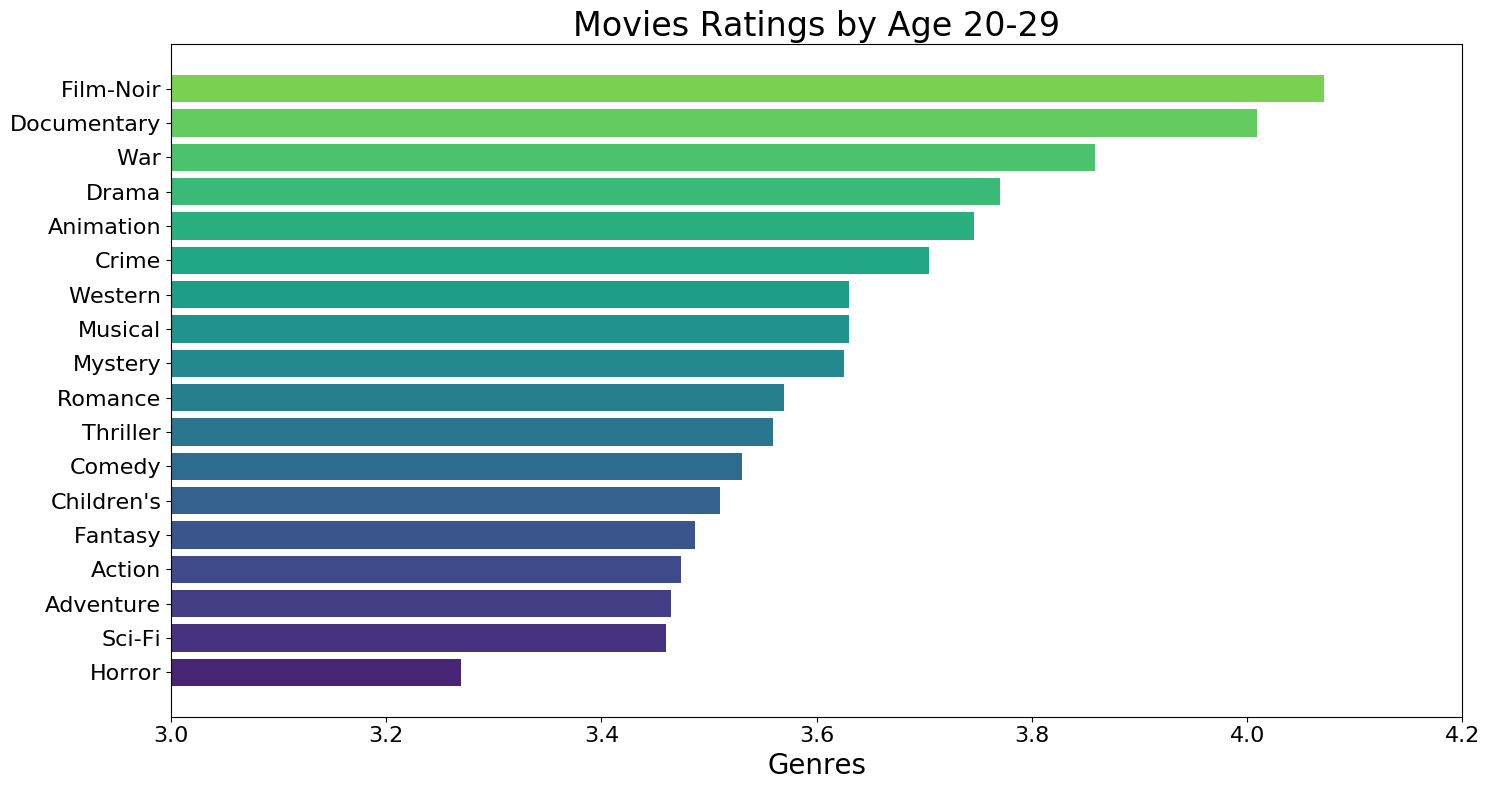

Age: 30-39
+-------------+-------------+
|    Genre    | Mean Rating |
+-------------+-------------+
| Documentary |     4.12    |
|  Film-Noir  |     4.09    |
|     War     |     3.96    |
|    Drama    |     3.87    |
|  Animation  |     3.83    |
|   Musical   |     3.80    |
|    Crime    |     3.79    |
|   Mystery   |     3.76    |
|   Western   |     3.71    |
|   Romance   |     3.71    |
|   Thriller  |     3.69    |
|  Children's |     3.68    |
|    Comedy   |     3.67    |
|    Action   |     3.60    |
|  Adventure  |     3.57    |
|    Sci-Fi   |     3.55    |
|   Fantasy   |     3.54    |
|    Horror   |     3.50    |
+-------------+-------------+


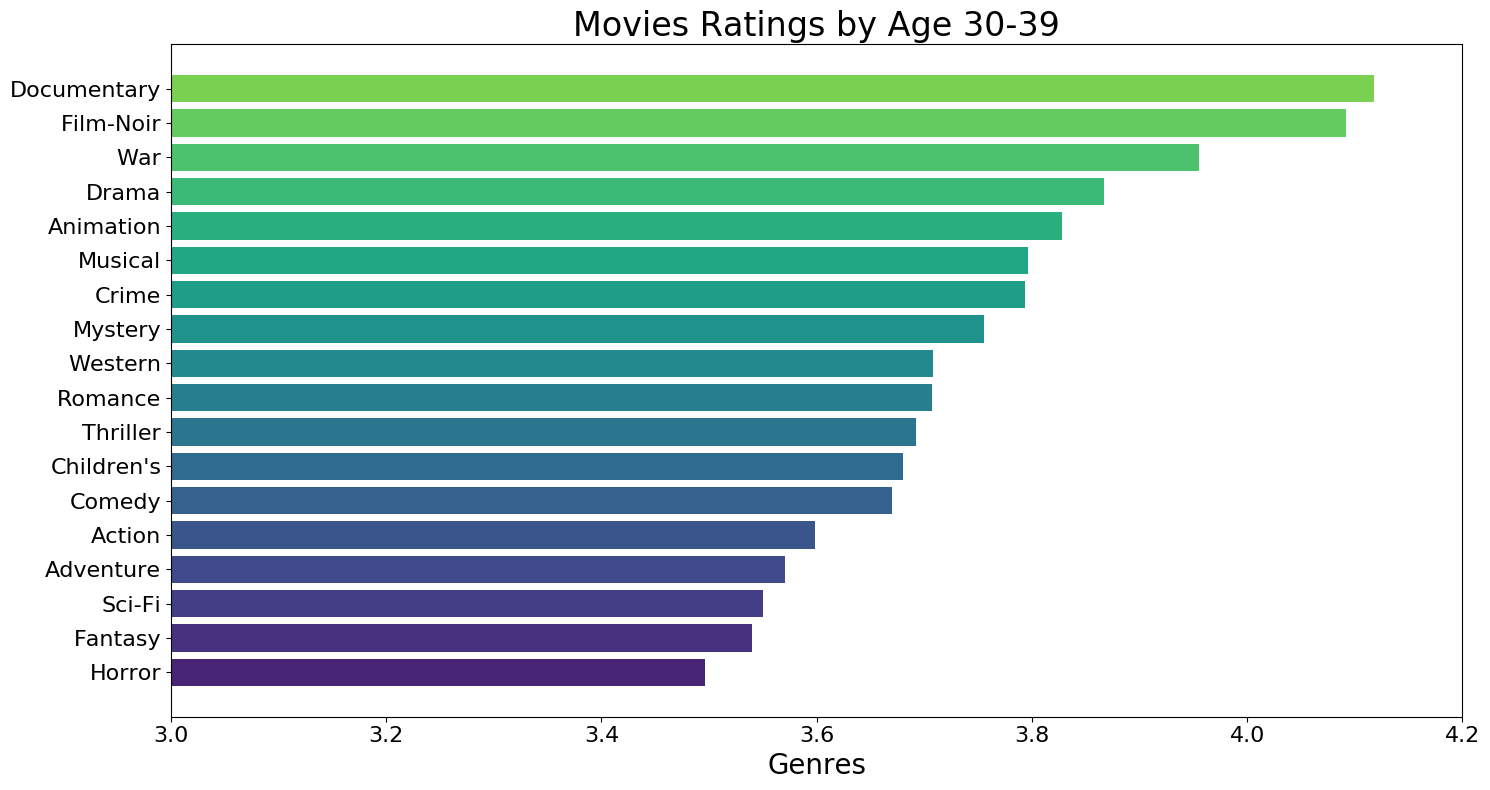

Age: 40-49
+-------------+-------------+
|    Genre    | Mean Rating |
+-------------+-------------+
|  Film-Noir  |     4.19    |
|     War     |     4.07    |
| Documentary |     4.02    |
|    Drama    |     3.98    |
|  Animation  |     3.97    |
|    Crime    |     3.97    |
|   Mystery   |     3.96    |
|   Musical   |     3.93    |
|  Children's |     3.90    |
|   Thriller  |     3.90    |
|   Romance   |     3.86    |
|    Comedy   |     3.84    |
|    Horror   |     3.79    |
|   Western   |     3.78    |
|    Action   |     3.77    |
|  Adventure  |     3.75    |
|    Sci-Fi   |     3.69    |
|   Fantasy   |     3.66    |
+-------------+-------------+


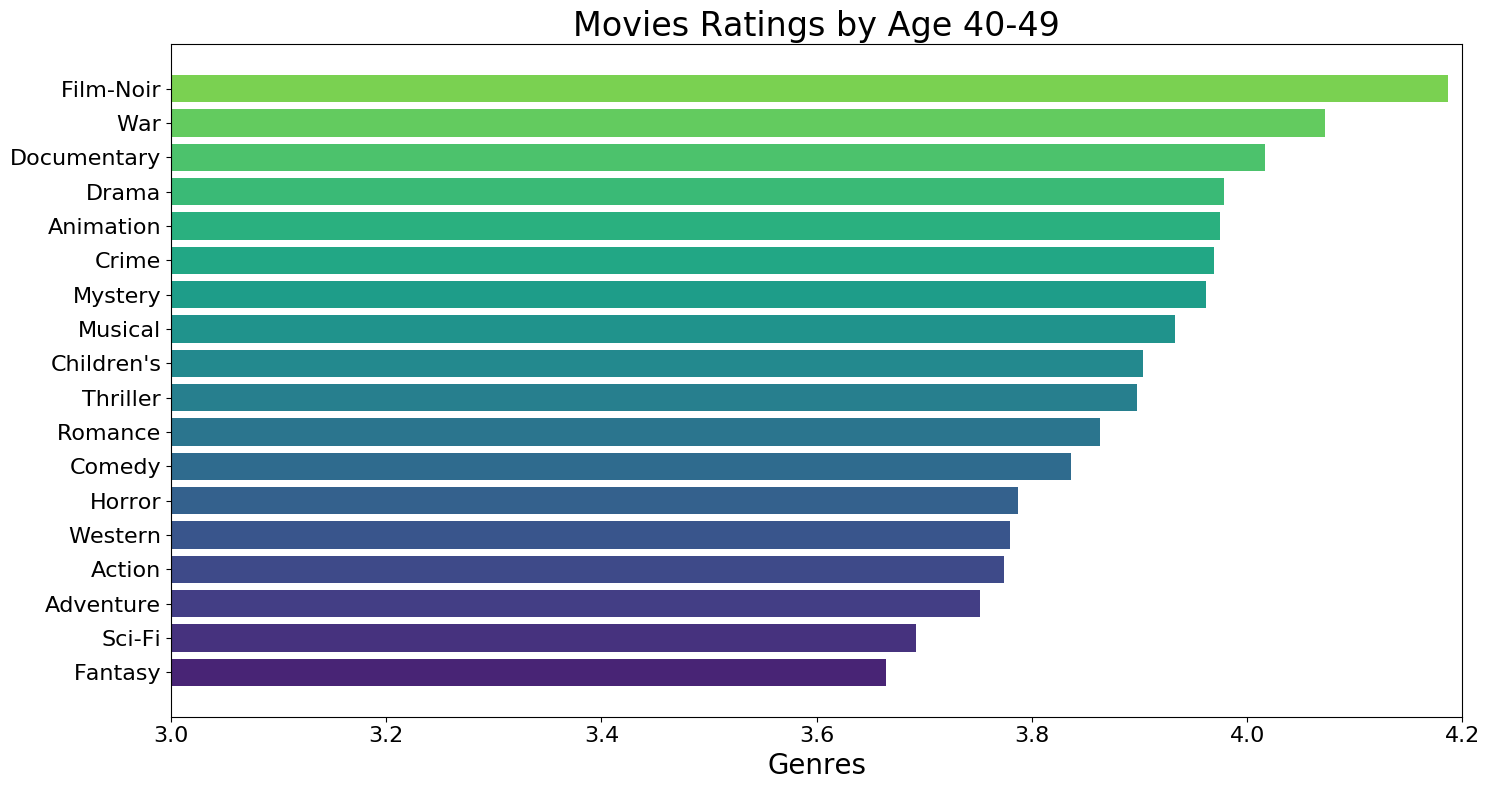

Age: 50+
+-------------+-------------+
|    Genre    | Mean Rating |
+-------------+-------------+
|  Film-Noir  |     4.21    |
|     War     |     4.09    |
|    Drama    |     4.03    |
|   Mystery   |     4.02    |
| Documentary |     3.97    |
|   Musical   |     3.96    |
|    Crime    |     3.96    |
|  Animation  |     3.90    |
|   Thriller  |     3.89    |
|   Romance   |     3.89    |
|  Children's |     3.87    |
|   Western   |     3.84    |
|    Comedy   |     3.83    |
|    Action   |     3.79    |
|  Adventure  |     3.79    |
|   Fantasy   |     3.70    |
|    Sci-Fi   |     3.69    |
|    Horror   |     3.68    |
+-------------+-------------+


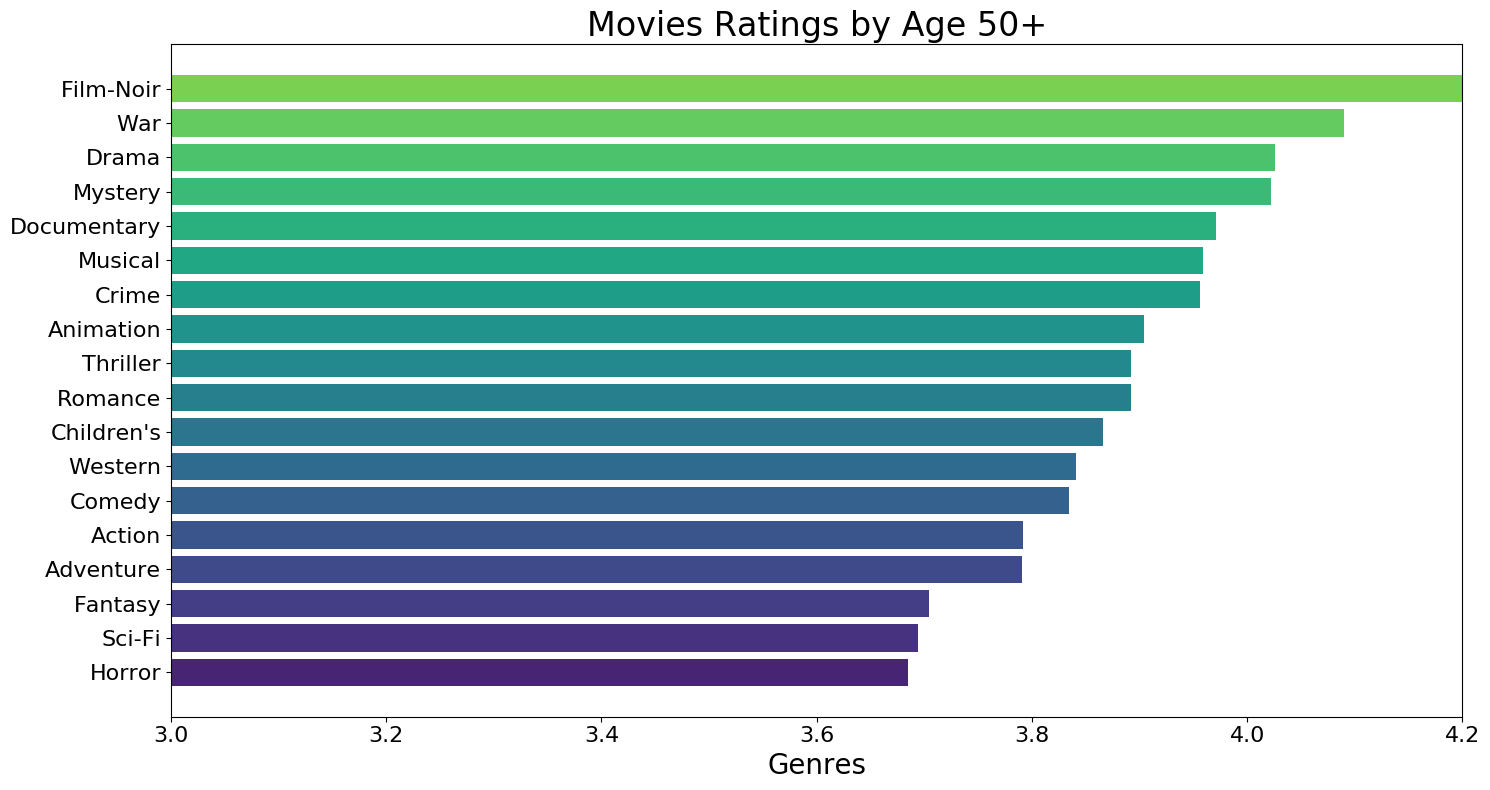

In [57]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

genres_list = ['Romance', 'Thriller', 'Drama', 'War', 'Action', 'Musical', 'Horror', 'Comedy', "Children\'s", 'Sci-Fi',
               'Film-Noir', 'Western', 'Documentary', 'Adventure', 'Fantasy', 'Crime', 'Mystery', 'Animation']
age_group = ('0-9', '10-19', '20-29', '30-39', '40-49', '50+')


def groupByAge(row):
    age = int(row['Age'])
    age = age if age < 60 else 50
    return age_group[age // 10]


def createTable(dict, title):
    sorted_list = reversed(sorted(dict.items(), key=operator.itemgetter(1)))
    table = PrettyTable(['Genre', 'Mean Rating'])
    for item in sorted_list:
        table.add_row([item[0], '{:.2f}'.format(item[1])])
    print(title)
    print(table)


def createMeanBarGraph(labels, values, title=None, colormap='viridis'):
    plt.figure(figsize=(15, 8), dpi=100)
    cm = plt.cm.get_cmap(colormap)
    colors = [cm(i) for i in np.linspace(0.1, 0.8, len(genres_list))]
    plt.barh(range(len(values)), values, align='center', color=colors)
    plt.xlim(3, 4.2)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Genres', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if title is not None:
        plt.title(title, fontsize=24)
    plt.tight_layout()
    plt.show()


ID_grouped_data = data.groupby('MovieID')

#Group the geners and put into data frame
genres_list_series = ID_grouped_data['Genres'].apply(lambda series: series.iloc[0].split('|'))
genres_df = genres_list_series.to_frame()
genre_series = genres_df.apply(lambda row: pd.Series(row.Genres), axis=1).stack().reset_index(level=1, drop=True)
genre_series.name = 'Genre'
genres_df = genres_df.drop('Genres', axis=1).join(genre_series)

#Apply the genre data to each age group
data['Age-group'] = data.apply(lambda row: groupByAge(row), axis=1)
age_grouped_data = data.groupby('Age-group')


age_genre_dict = {}
age_genre_len_dict = {}
for age_index, df in age_grouped_data:
    age_genre_dict[age_index] = {}
    age_genre_len_dict[age_index] = {}
    for genre in genres_list:
        genre_index = genres_df.index[genres_df.Genre == genre]
        genre_filtered_data = df[df['MovieID'].isin(genre_index)]
        count = genre_filtered_data.groupby('MovieID').size()
        index_filter = count.index[count > 50]
        genre_filtered_data = genre_filtered_data[genre_filtered_data.MovieID.isin(index_filter)]
        mean = genre_filtered_data['Rating'].mean()
        age_genre_dict[age_index][genre] = mean if mean > 0 else 0
        age_genre_len_dict[age_index][genre] = len(genre_filtered_data)

#create the final results by using the table and graphs that were generated        
for age in age_genre_dict:
    createTable(age_genre_dict[age], 'Age: ' + age)
    sorted_list = reversed(sorted(age_genre_dict[age].items(), key=operator.itemgetter(1)))
    keys = [item[0] for item in sorted_list]
    values = [age_genre_dict[age][key] for key in keys]
    keys.reverse()
    values.reverse()
    createMeanBarGraph(keys, values, 'Movies Ratings by Age ' + age)



# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:
#The problem that we want to solve is how to help upcoming movie companies determine which age
#group would prefer which movie genre and make these recommendations to their users to make 
#their business model more effective as well as appeal to more users.

#We used the data exploration component above to find the ratings that each age group gives 
#on average for a movie genre. We then used those ratings and applied them to an equation to
#find the precentage a genre may be of interest to a specific group which is calculated by 
#mutiplying the mean rating of each genre and the quotient of the genre rating number across 
#all ages and 5, which is the max rating number to assign 



Write codes to implement the solution in python:

In [58]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#associate the age and genre together
totals = {}
for age in age_genre_len_dict:
    totals[age] = 0
    for genre in age_genre_len_dict[age]:
        totals[age] +=  age_genre_len_dict[age][genre]

#use calculation to figure out the recommendation percentage        
recommend_index_dict={} #store here
max_values={}
for age in age_genre_dict:
    recommend_index_dict[age]={}
    values = []
    for genre in age_genre_dict[age]:  
        num = age_genre_len_dict[age][genre]
        value = age_genre_dict[age][genre] * num / totals[age]
        recommend_index_dict[age][genre] = value
        values.append(value)
    max_values[age] = max(values)
        
for age in recommend_index_dict:
    for genre in recommend_index_dict[age]:
        recommend_index_dict[age][genre] = int(recommend_index_dict[age][genre] / max_values[age]*100)
        recommend_index_dict[age][genre]+= 0 if recommend_index_dict[age][genre] > 0 else 1



# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


Age: 0-9
+-------------+-----------------+
|    Genre    | Recommend Index |
+-------------+-----------------+
|    Comedy   |       100       |
|    Action   |        79       |
|    Sci-Fi   |        57       |
|  Adventure  |        53       |
|    Drama    |        51       |
|  Children's |        44       |
|     War     |        31       |
|   Romance   |        31       |
|  Animation  |        29       |
|   Thriller  |        28       |
|   Fantasy   |        18       |
|   Musical   |        17       |
|    Crime    |        8        |
|    Horror   |        5        |
|   Mystery   |        2        |
| Documentary |        1        |
|   Western   |        1        |
|  Film-Noir  |        1        |
+-------------+-----------------+


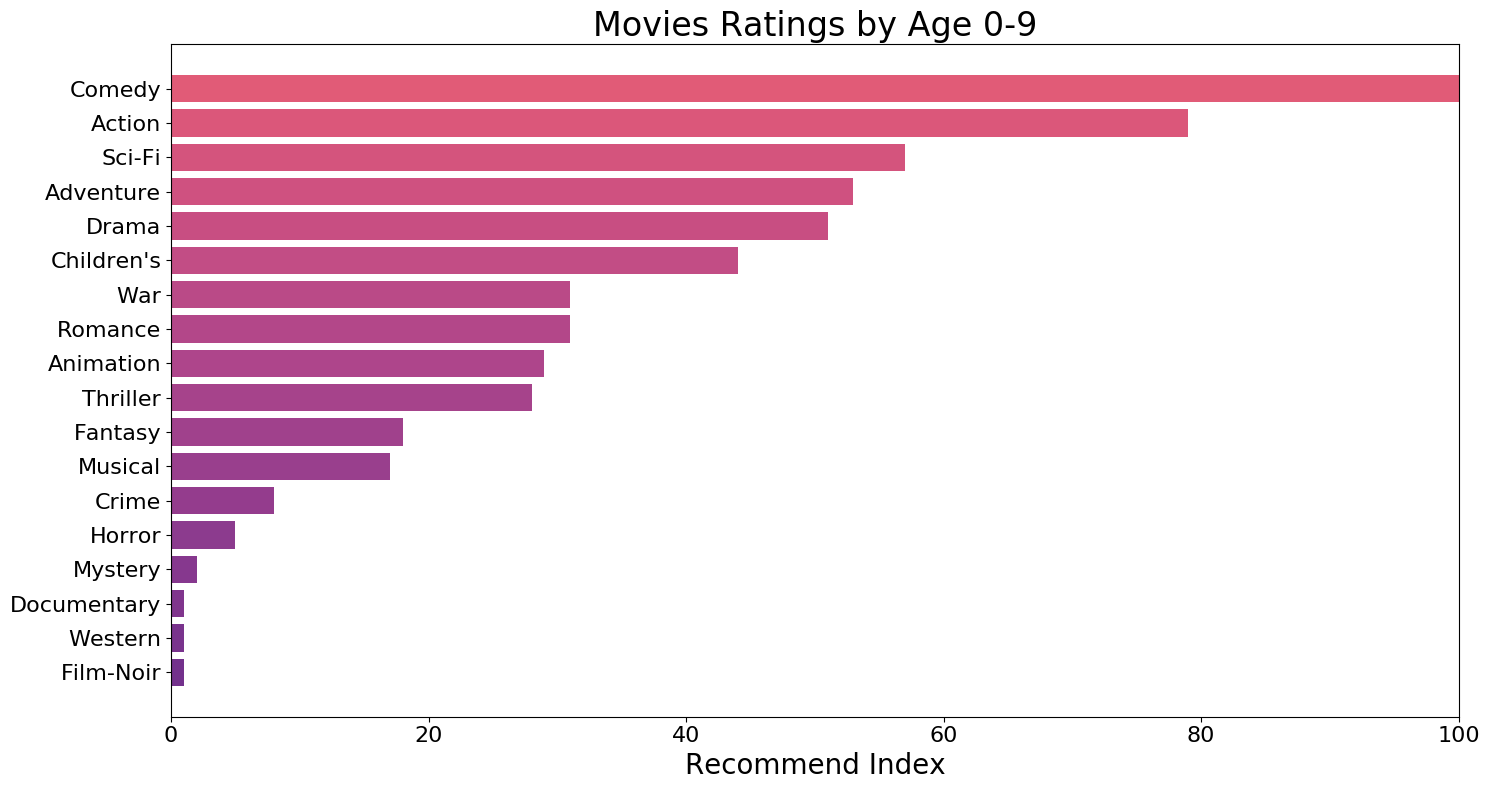

Age: 10-19
+-------------+-----------------+
|    Genre    | Recommend Index |
+-------------+-----------------+
|    Comedy   |       100       |
|    Drama    |        83       |
|    Action   |        77       |
|   Thriller  |        53       |
|    Sci-Fi   |        44       |
|  Adventure  |        40       |
|   Romance   |        37       |
|    Crime    |        24       |
|  Children's |        23       |
|     War     |        18       |
|    Horror   |        17       |
|  Animation  |        16       |
|   Fantasy   |        11       |
|   Musical   |        11       |
|   Mystery   |        9        |
|   Western   |        3        |
|  Film-Noir  |        3        |
| Documentary |        1        |
+-------------+-----------------+


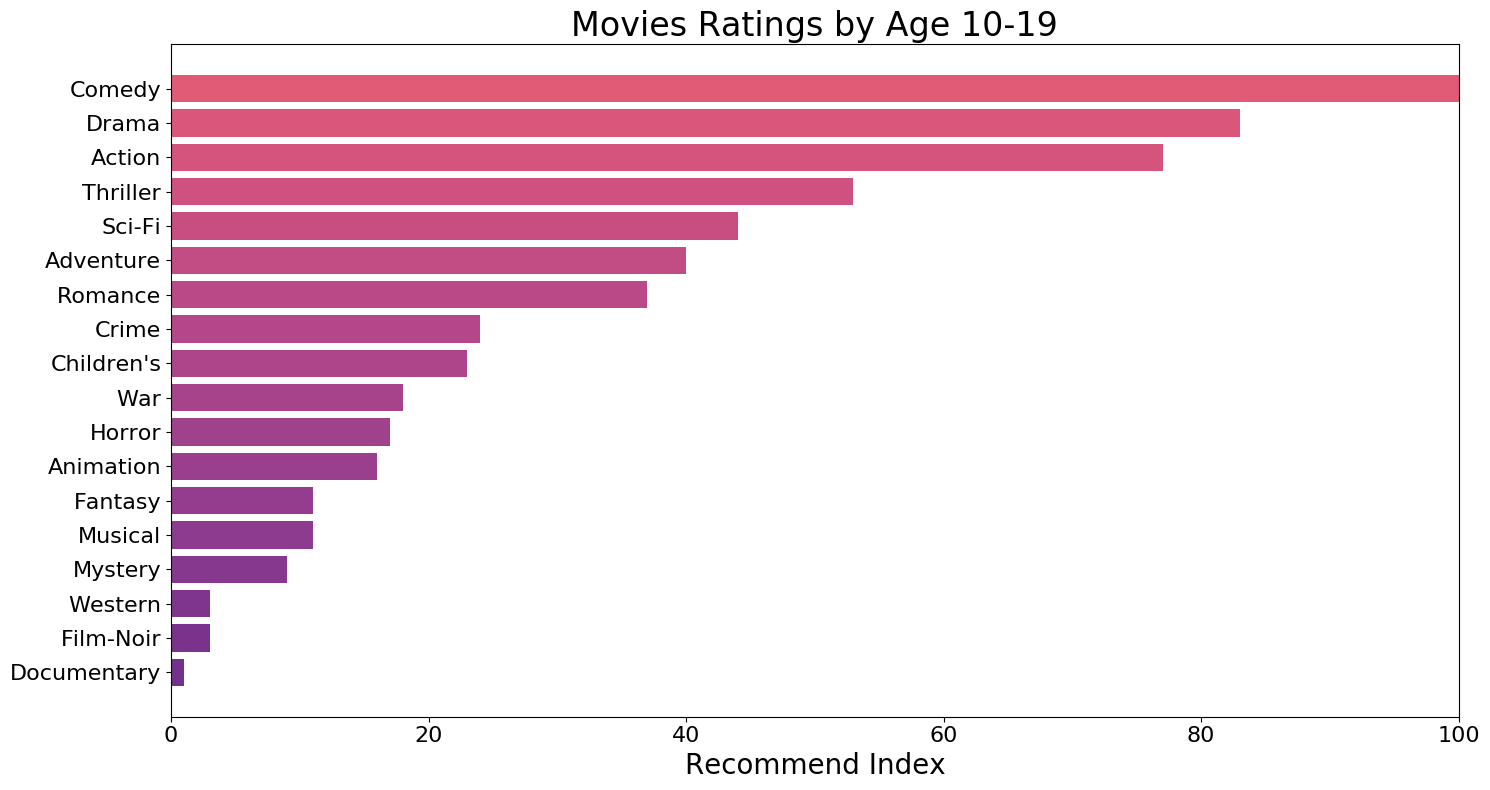

Age: 20-29
+-------------+-----------------+
|    Genre    | Recommend Index |
+-------------+-----------------+
|    Drama    |       100       |
|    Comedy   |        99       |
|    Action   |        75       |
|   Thriller  |        55       |
|    Sci-Fi   |        45       |
|   Romance   |        41       |
|  Adventure  |        37       |
|    Crime    |        24       |
|    Horror   |        19       |
|     War     |        19       |
|  Children's |        17       |
|  Animation  |        12       |
|   Mystery   |        11       |
|   Fantasy   |        10       |
|   Musical   |        10       |
|   Western   |        5        |
|  Film-Noir  |        5        |
| Documentary |        2        |
+-------------+-----------------+


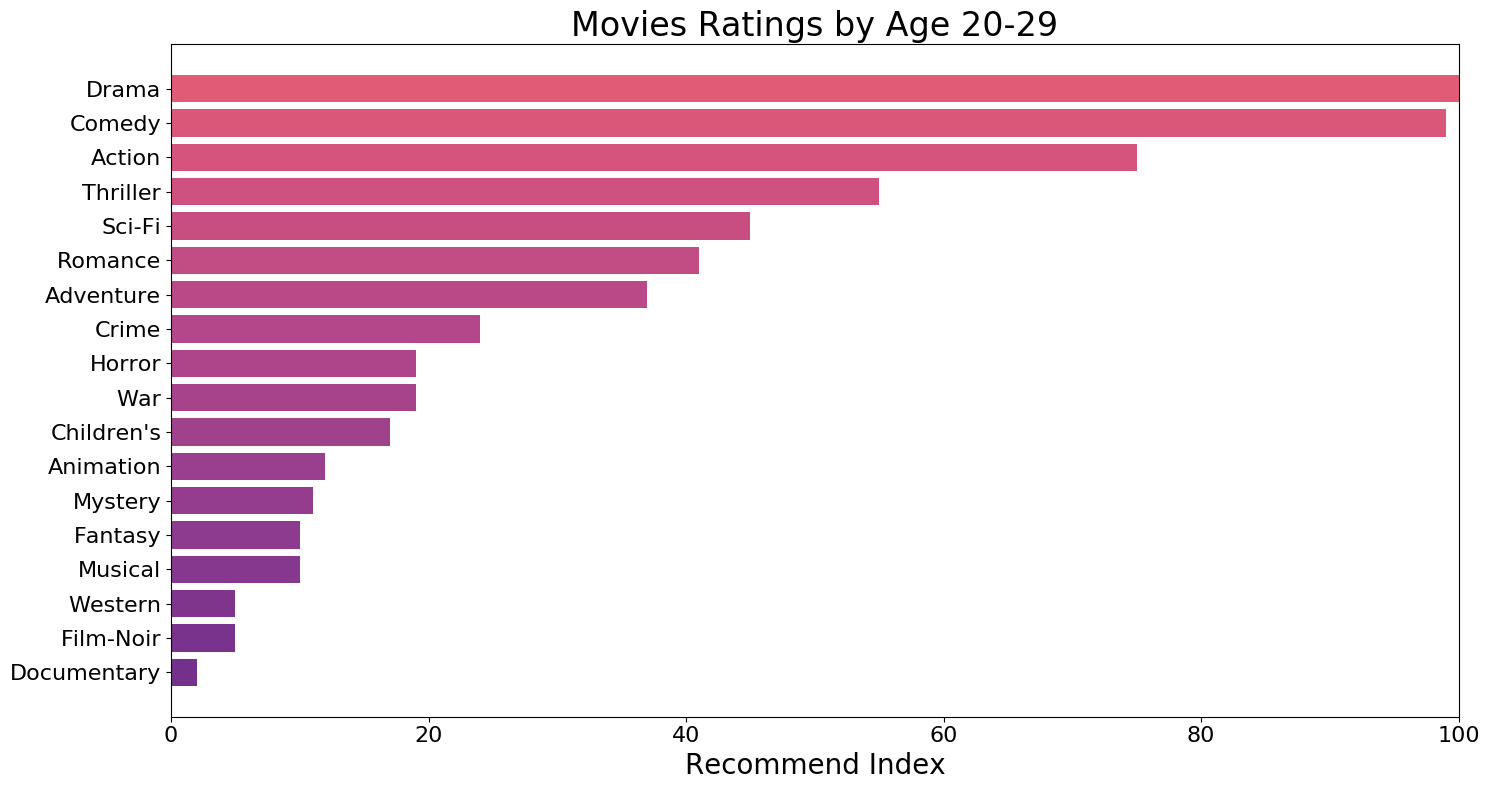

Age: 30-39
+-------------+-----------------+
|    Genre    | Recommend Index |
+-------------+-----------------+
|    Drama    |       100       |
|    Comedy   |        94       |
|    Action   |        75       |
|   Thriller  |        53       |
|    Sci-Fi   |        48       |
|   Romance   |        42       |
|  Adventure  |        38       |
|     War     |        23       |
|    Crime    |        22       |
|  Children's |        17       |
|    Horror   |        17       |
|  Animation  |        12       |
|   Mystery   |        12       |
|   Musical   |        12       |
|   Fantasy   |        10       |
|  Film-Noir  |        7        |
|   Western   |        6        |
| Documentary |        1        |
+-------------+-----------------+


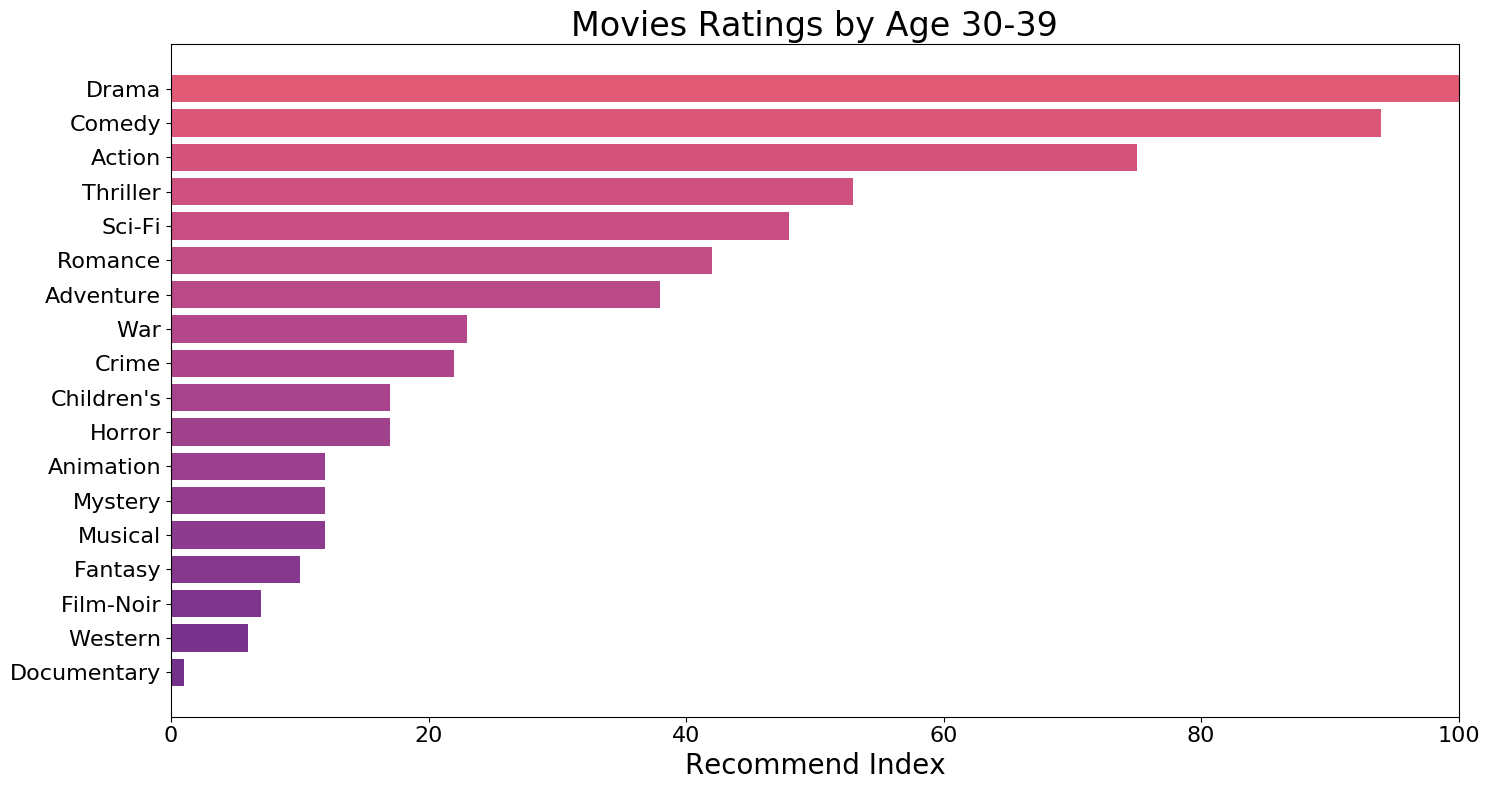

Age: 40-49
+-------------+-----------------+
|    Genre    | Recommend Index |
+-------------+-----------------+
|    Drama    |       100       |
|    Comedy   |        85       |
|    Action   |        70       |
|    Sci-Fi   |        49       |
|   Thriller  |        45       |
|   Romance   |        44       |
|  Adventure  |        38       |
|     War     |        30       |
|    Crime    |        21       |
|  Children's |        12       |
|    Horror   |        12       |
|   Musical   |        12       |
|   Mystery   |        11       |
|   Fantasy   |        9        |
|  Film-Noir  |        8        |
|  Animation  |        7        |
|   Western   |        6        |
| Documentary |        1        |
+-------------+-----------------+


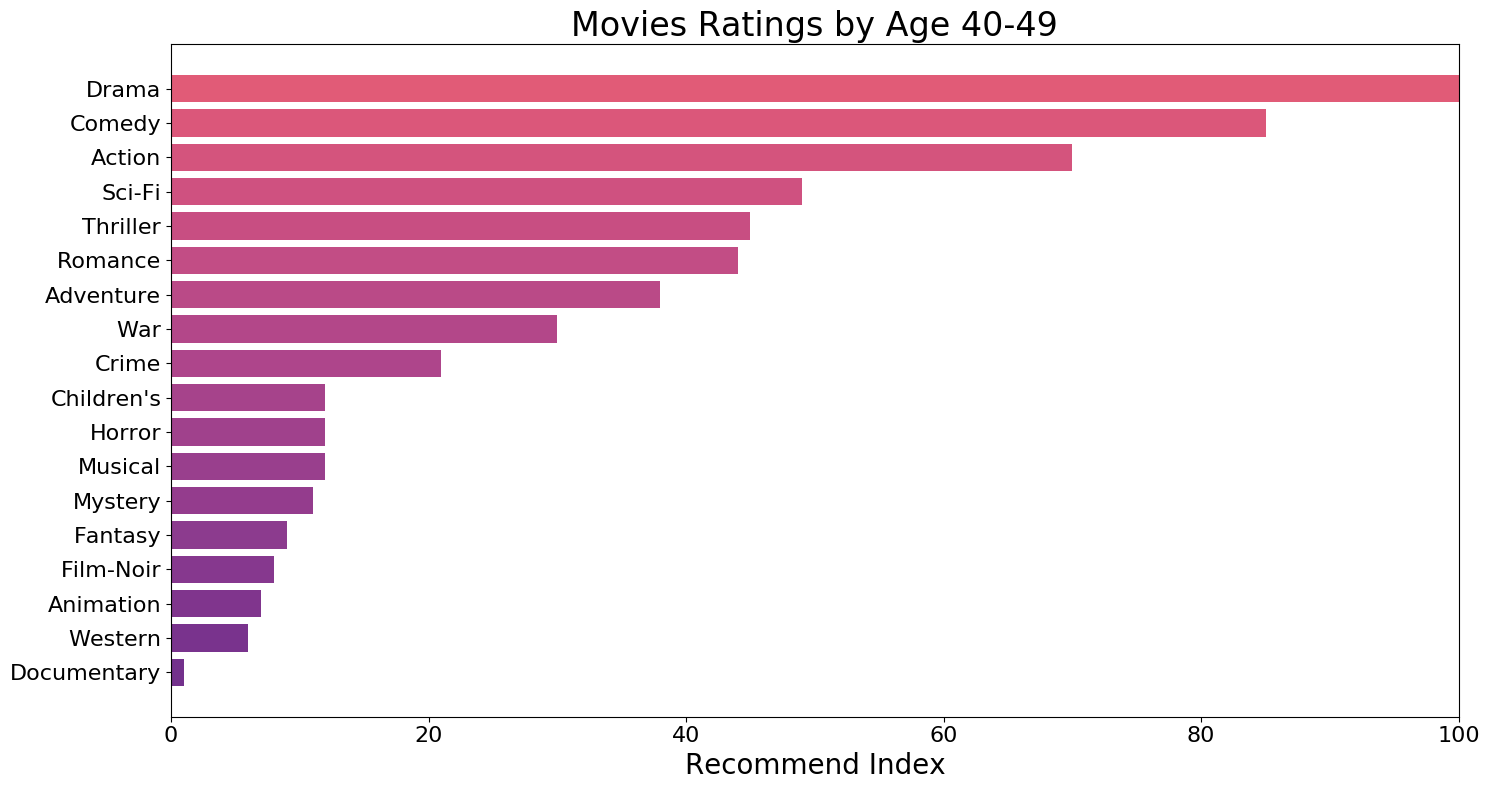

Age: 50+
+-------------+-----------------+
|    Genre    | Recommend Index |
+-------------+-----------------+
|    Drama    |       100       |
|    Comedy   |        71       |
|    Action   |        56       |
|   Thriller  |        42       |
|   Romance   |        39       |
|    Sci-Fi   |        35       |
|  Adventure  |        30       |
|     War     |        27       |
|    Crime    |        20       |
|   Mystery   |        13       |
|   Musical   |        10       |
|   Western   |        9        |
|  Children's |        9        |
|  Film-Noir  |        8        |
|    Horror   |        8        |
|   Fantasy   |        6        |
|  Animation  |        5        |
| Documentary |        1        |
+-------------+-----------------+


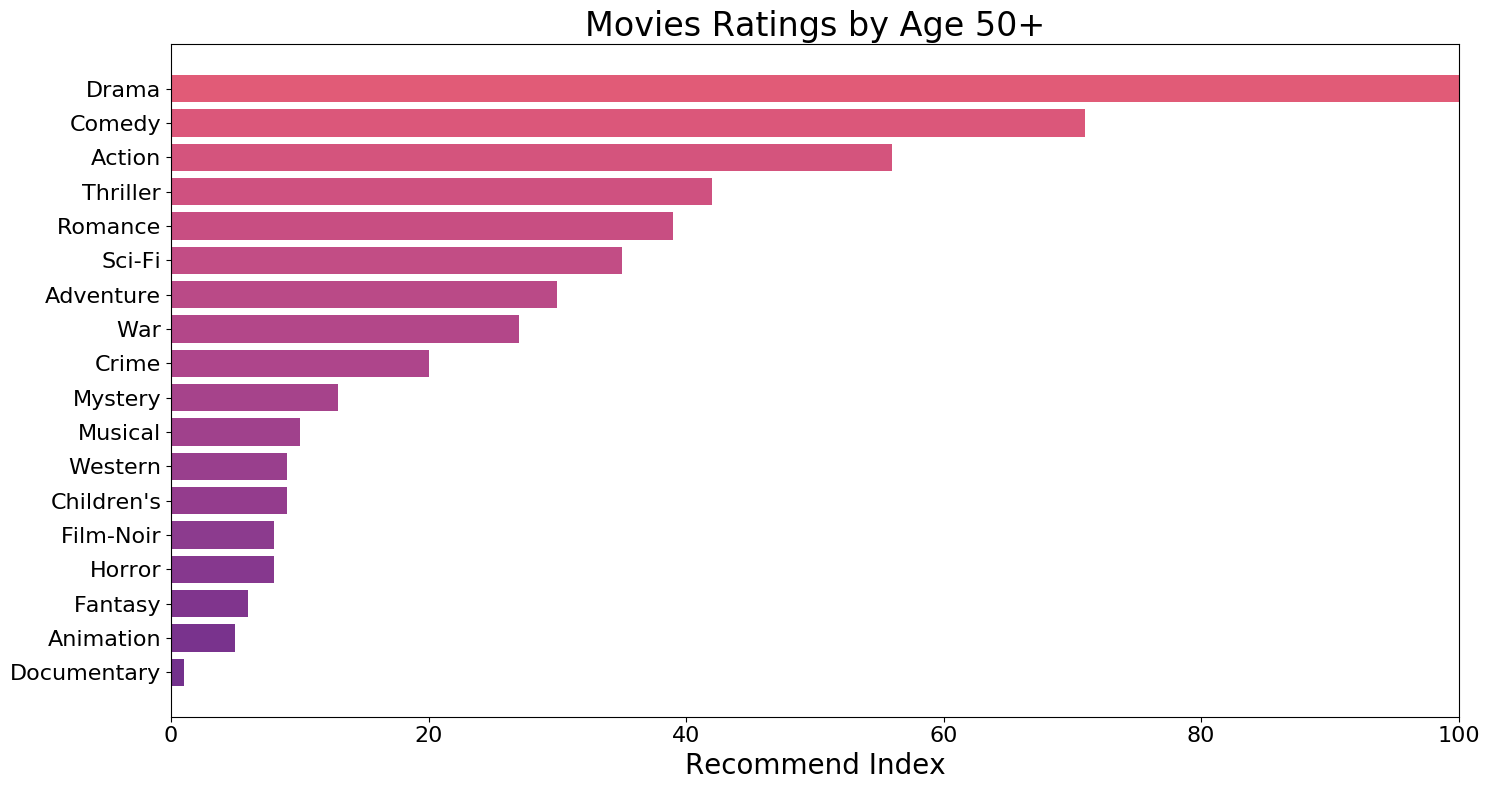

In [59]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

def createTable(dict, title):
    sorted_list = reversed(sorted(dict.items(), key=operator.itemgetter(1)))
    table = PrettyTable(['Genre', 'Recommend Index'])
    for item in sorted_list:
        table.add_row([item[0], '{:d}'.format(item[1])])
    print(title)
    print(table)

def createRecommendedBarGraph(labels, values, title=None, colormap='magma'):
    plt.figure(figsize=(15, 8), dpi=100)
    cm = plt.cm.get_cmap(colormap)
    colors = [cm(i) for i in np.linspace(0.3, 0.6, len(genres_list))]
    plt.barh(range(len(values)), values, align='center', color=colors, alpha = 0.9)
    plt.xlim(0,100)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Recommend Index', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    if title is not None:
        plt.title(title, fontsize=24)
    plt.tight_layout()
    plt.show()

#create the final results by using the table and graphs that were generated
for age in recommend_index_dict:
    createTable(recommend_index_dict[age], 'Age: ' + age)
    sorted_list = reversed(sorted(recommend_index_dict[age].items(), key=operator.itemgetter(1)))
    keys = [item[0] for item in sorted_list]
    values = [recommend_index_dict[age][key] for key in keys]
    keys.reverse()
    values.reverse()
    createRecommendedBarGraph(keys, values, 'Movies Ratings by Age ' + age)




*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 7 minutes' talk) to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 4".
        
** Note: Each team only needs to submit one submission in Canvas **